# Problem a

In [8]:
import numpy as np

In [1]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
eight_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
eight_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

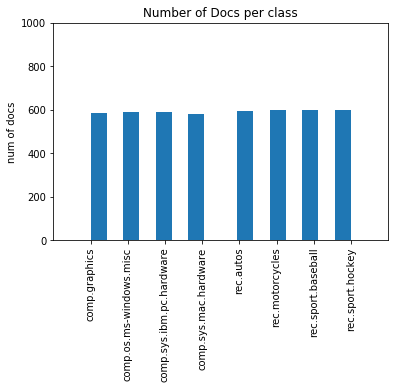

In [2]:
# PLOTTING
import matplotlib.pyplot as plt
plt.hist(eight_train.target, bins = 16, align = 'mid')
plt.title('Number of Docs per class')
plt.ylabel('num of docs')
plt.xticks(range(8),categories,rotation = 90)
plt.xlim([-1,8])
plt.ylim([0,1000])

plt.show()

# Problem b

In [3]:
# TOKENIZER
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction import text

import nltk
import string
import re

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def tokenizer_stem(text):
    # Convert each punctuation character to empty character.
    punc_remove_map = text.maketrans('', '', string.punctuation)
    text_no_punc = text.translate(punc_remove_map)
    
    # remove non-ascii characters
    ascii_text_no_punc = "".join(ch for ch in text_no_punc if ord(ch) < 128) 
    
    # Convert words that share the same stem to the stem
    tokens = ascii_text_no_punc.split()
    stemmed_tokens = [stemmer.stem(n) for n in tokens]
    return stemmed_tokens

stop_words = text.ENGLISH_STOP_WORDS

count_vectorizer_min_df_2 = CountVectorizer(analyzer = 'word', tokenizer = tokenizer_stem,
                                            stop_words = stop_words,min_df = 2)
count_vectorizer_min_df_5 = CountVectorizer(analyzer = 'word', tokenizer = tokenizer_stem,
                                            stop_words = stop_words,min_df = 5)

count_min_df_2 = count_vectorizer_min_df_2.fit_transform(eight_train.data)
count_min_df_5 = count_vectorizer_min_df_5.fit_transform(eight_train.data)

print ("Final Number of Terms Extracted :" + str(count_min_df_2.shape[1]))
print ("Final Number of Terms Extracted :" + str(count_min_df_5.shape[1]))

Final Number of Terms Extracted :21842
Final Number of Terms Extracted :8928


In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer() # TFIDF transformer for problem c and problem d

# Problem c

In [5]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train')
twenty_train_target = twenty_train.target_names  # extract all the class names


allwords = []
# organize words in 20 categories of data in one matrix
for counter in range(20):
    allwords.append("")
for index in range(len(twenty_train.data)):
    category = twenty_train.target[index]
    allwords[category] = allwords[category] + " " + twenty_train.data[index]
    
#define a function to extract 10 most significant terms
def ten_most_significant_terms(index):
    topwords = []
    presentclass = allwords_tficf.toarray()[index]
    topindices = sorted(range(len(presentclass)), key = lambda index: presentclass[index])[-10:]
    for index in topindices:
        topwords.append(count_vectorizer_min_df_2.get_feature_names()[index])
    return topwords

#After stemming and tokenizing, performing tficf    
allwords_count_min_df_2 = count_vectorizer_min_df_2.fit_transform(allwords)
allwords_tficf = tfidf_transformer.fit_transform(allwords_count_min_df_2)

index_ibm = twenty_train_target.index("comp.sys.ibm.pc.hardware")
index_mac = twenty_train_target.index("comp.sys.mac.hardware")
index_forsale = twenty_train_target.index("misc.forsale")
index_christian = twenty_train_target.index("soc.religion.christian")

most_significant_words_ibm = ten_most_significant_terms(index_ibm)
most_significant_words_mac = ten_most_significant_terms(index_mac)
most_significant_words_forsale = ten_most_significant_terms(index_forsale)
most_significant_words_christian = ten_most_significant_terms(index_christian)

print("10 most significant terms for comp.sys.ibm.pc.hardware", most_significant_words_ibm)
print("10 most significant terms for comp.sys.mac.hardware", most_significant_words_mac)
print("10 most significant terms for misc.forsale", most_significant_words_forsale)
print("10 most significant terms for soc.religion.christian", most_significant_words_christian)

10 most significant terms for comp.sys.ibm.pc.hardware ['control', 'card', 'organ', 'subject', 'line', 'use', 'ide', 'thi', 'scsi', 'drive']
10 most significant terms for comp.sys.mac.hardware ['problem', 'appl', 'simm', 'quadra', 'use', 'organ', 'subject', 'mac', 'line', 'thi']
10 most significant terms for misc.forsale ['use', 'new', 'thi', 'univers', '2', 'organ', 'sale', '1', 'subject', 'line']
10 most significant terms for soc.religion.christian ['line', 'peopl', 'subject', 'church', 'hi', 'jesu', 'christian', 'wa', 'god', 'thi']


# Problem d

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

# Compute tfidf matrix
eight_train_tfidf_min_df_2 = tfidf_transformer.fit_transform(count_min_df_2)
eight_train_tfidf_min_df_5 = tfidf_transformer.fit_transform(count_min_df_5)


k = 50

# Latent Sematic Analysis(LSA)
lsa_model = TruncatedSVD(n_components=k, random_state=42)
# Dense matrices computed using LSA
eight_train_tfidf_min_df_2_lsa = lsa_model.fit_transform(eight_train_tfidf_min_df_2)
eight_train_tfidf_min_df_5_lsa = lsa_model.fit_transform(eight_train_tfidf_min_df_5)

print(eight_train_tfidf_min_df_2.shape)
print(eight_train_tfidf_min_df_5.shape)

print(eight_train_tfidf_min_df_2_lsa.shape)
print(eight_train_tfidf_min_df_5_lsa.shape)



# Non-Negative Matrix Factorization (NMF)
nmf_model = NMF(k, random_state = 42)
# Dense matrices computed using NMF
eight_train_tfidf_min_df_2_nmf = nmf_model.fit_transform(eight_train_tfidf_min_df_2)
eight_train_tfidf_min_df_5_nmf = nmf_model.fit_transform(eight_train_tfidf_min_df_2)
print(eight_train_tfidf_min_df_2_nmf.shape)
print(eight_train_tfidf_min_df_5_nmf.shape)

(4732, 21842)
(4732, 8928)
(4732, 50)
(4732, 50)
(4732, 50)
(4732, 50)


# Problem e

In [35]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

COMPUTER_TECHNOLOGY = 0
RECREATIONAL_ACTIVITY = 1

# index of the last computer technology data group in variable 'categories'
LAST_COMPUTER_TECHNOLOGY_INDEX = 3
def get_target_values(target_array):
    target_values = []
    for n in range(target_array.shape[0]):
        if target_array[n] <= LAST_COMPUTER_TECHNOLOGY_INDEX:
            target_values.append(COMPUTER_TECHNOLOGY)
        else:
            target_values.append(RECREATIONAL_ACTIVITY)
    return np.array(target_values)


# Plotting ROC curve 
def plot_roc_curve(target_values, predicted_prob, roc_title):
    
    fpr, tpr, thresholds = roc_curve(target_values, predicted_prob)
    area_under_roc = auc(fpr,tpr)
    plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.2f' % area_under_roc)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(roc_title)
    plt.legend(loc="lower right")
    plt.show()


# confusion matrix, accuracy, recall and precision
def compute_prediction_stats(target_values, predicted_data):
    
    confusionmatrix = confusion_matrix(target_values, predicted_data)
    accuracy = accuracy_score(target_values, predicted_data)
    precision = precision_score(target_values, predicted_data)
    recall = recall_score(target_values, predicted_data)
    print("confusion matrix")
    print(confusionmatrix)
    print("accuracy =",accuracy)
    print("precision =", precision)
    print("recall =",recall)
    
eight_train_target = get_target_values(eight_train.target)
eight_test_target = get_target_values(eight_test.target)

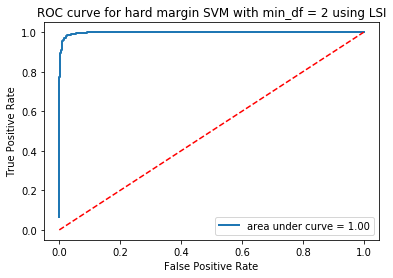

confusion matrix
[[1515   45]
 [  24 1566]]
accuracy = 0.978095238095
precision = 0.972067039106
recall = 0.984905660377


In [18]:
#performing hard margin SVM classifier for min_df = 2 using LSI
hard_min2_pipelined = Pipeline([
                                ('vect', count_vectorizer_min_df_2),
                                ('tfidf', tfidf_transformer),
                                ('svd', lsa_model),
                                ('clf', SVC(C = 1000, kernel = 'linear', probability = True))
])


hard_min2_pipelined = hard_min2_pipelined.fit(eight_train.data, eight_train_target)
predicted_prob = hard_min2_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = hard_min2_pipelined.predict(eight_test.data)

roc_title = 'ROC curve for hard margin SVM with min_df = 2 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

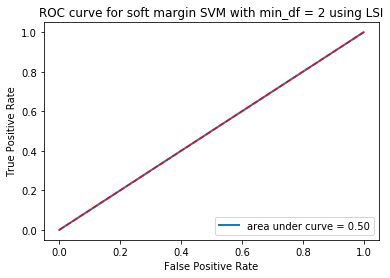

confusion matrix
[[   0 1560]
 [   0 1590]]
accuracy = 0.504761904762
precision = 0.504761904762
recall = 1.0


In [19]:
# performing soft margin SVM classifier for min_df = 2 using LSI
soft_min2_pipelined = Pipeline([
                                ('vect', count_vectorizer_min_df_2),
                                ('tfidf', tfidf_transformer),
                                ('svd', lsa_model),
                                ('clf', SVC(C = 0.001, kernel = 'linear',  probability = True))
])

soft_min2_pipelined = soft_min2_pipelined.fit(eight_train.data, eight_train_target)
predicted_prob = soft_min2_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = soft_min2_pipelined.predict(eight_test.data)

roc_title = 'ROC curve for soft margin SVM with min_df = 2 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

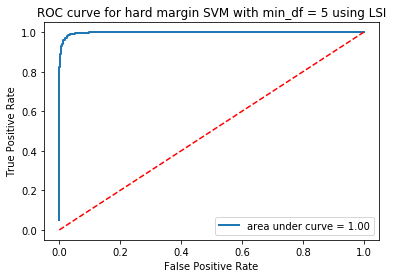

confusion matrix
[[1516   44]
 [  25 1565]]
accuracy = 0.978095238095
precision = 0.97265382225
recall = 0.98427672956


In [20]:
#performing hard margin SVM classifier for min_df = 5 using LSI
hard_min5_pipelined = Pipeline([
                                ('vect', count_vectorizer_min_df_5),
                                ('tfidf', tfidf_transformer),
                                ('svd', lsa_model),
                                ('clf', SVC(C = 1000,kernel = 'linear', probability = True))
])


hard_min5_pipelined = hard_min5_pipelined.fit(eight_train.data, eight_train_target)
predicted_prob = hard_min5_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = hard_min5_pipelined.predict(eight_test.data)

roc_title = 'ROC curve for hard margin SVM with min_df = 5 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

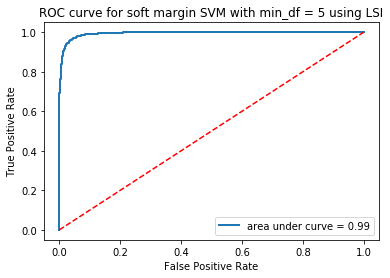

confusion matrix
[[   0 1560]
 [   0 1590]]
accuracy = 0.504761904762
precision = 0.504761904762
recall = 1.0


In [21]:
#performing soft margin SVM classifier for min_df = 5 using LSI
soft_min5_pipelined = Pipeline([
                                ('vect', count_vectorizer_min_df_5),
                                ('tfidf', tfidf_transformer),
                                ('svd', lsa_model),
                                ('clf', SVC(C = 0.001,kernel = 'linear',probability = True))
])

soft_min5_pipelined = soft_min5_pipelined.fit(eight_train.data, eight_train_target)
predicted_prob = soft_min5_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = soft_min5_pipelined.predict(eight_test.data)

roc_title = 'ROC curve for soft margin SVM with min_df = 5 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

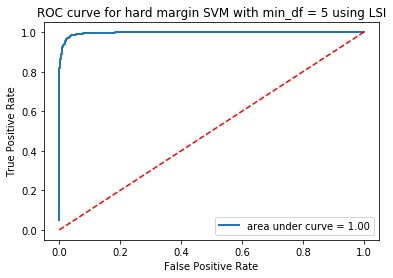

confusion matrix
[[1496   64]
 [  25 1565]]
accuracy = 0.971746031746
precision = 0.960712093309
recall = 0.98427672956


In [22]:
#performing hard margin SVM classifier for min_df = 2 using NMF
hard_min2_pipelined = Pipeline([
                                ('vect', count_vectorizer_min_df_5),
                                ('tfidf', tfidf_transformer),
                                ('svd', nmf_model),
                                ('clf', SVC(C = 1000,kernel = 'linear', probability = True))
])


hard_min2_pipelined = hard_min2_pipelined.fit(eight_train.data, eight_train_target)
predicted_prob = hard_min2_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = hard_min2_pipelined.predict(eight_test.data)

roc_title = 'ROC curve for hard margin SVM with min_df = 2 using NMF'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

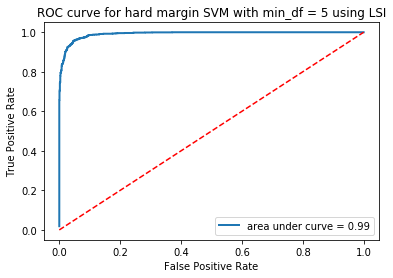

confusion matrix
[[   0 1560]
 [   0 1590]]
accuracy = 0.504761904762
precision = 0.504761904762
recall = 1.0


In [15]:
#performing soft margin SVM classifier for min_df = 2 using NMF
hard_min2_pipelined = Pipeline([
                                ('vect', count_vectorizer_min_df_5),
                                ('tfidf', tfidf_transformer),
                                ('svd', nmf_model),
                                ('clf', SVC(C = 0.001,kernel = 'linear', probability = True))
])


hard_min2_pipelined = hard_min2_pipelined.fit(eight_train.data, eight_train_target)
predicted_prob = hard_min5_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = hard_min5_pipelined.predict(eight_test.data)

roc_title = 'ROC curve for soft margin SVM with min_df = 2 using NMF'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)

# Problem f

In [28]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

In [41]:
# min_df = 2 using LSI to calculate best gamma 
max_accuracy = 0
for i in range (-3,4):
    print("gamma coefficient =",i)
    for train, test in kf.split(eight_train.data):
        train_i = np.array(eight_train.data)[train]
        train_j = eight_train_target[train]
        test_i = np.array(eight_train.data)[test]
        test_j = eight_train_target[test]
        lsa_pipelined_min2 = Pipeline([
                                       ('vect', count_vectorizer_min_df_2),
                                       ('tfidf', tfidf_transformer),
                                       ('svd', lsa_model),
                                       ('clf', SVC(C = 10**i,kernel = 'linear', probability = True))
])
        lsa_pipelined_min2 = lsa_pipelined_min2.fit(train_i,train_j)
        predicted_data = lsa_pipelined_min2.predict(test_i)
        accuracy = np.mean(predicted_data == test_j)
        print(accuracy)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            lsa_pipelined_min2_final = lsa_pipelined_min2

lsa_pipelined_min2_final = lsa_pipelined_min2_final.fit(eight_train.data, eight_train_target)
#predicted_prob = hard_min5_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = lsa_pipelined_min2_final.predict(eight_test.data)

#roc_title = 'ROC curve for hard margin SVM with min_df = 5 using LSI'
#plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)
           

gamma coefficient = -3
0.458289334741
0.465681098205
0.510570824524
0.508456659619
0.512684989429
gamma coefficient = -2
0.458289334741
0.466737064414
0.512684989429
0.509513742072
0.514799154334
gamma coefficient = -1
0.963041182682
0.971488912355
0.957716701903
0.969344608879
0.973572938689
gamma coefficient = 0
0.971488912355
0.974656810982
0.966173361522
0.973572938689
0.977801268499
gamma coefficient = 1
0.975712777191
0.974656810982
0.968287526427
0.975687103594
0.982029598309
gamma coefficient = 2
0.972544878564
0.980992608237
0.973572938689
0.974630021142
0.979915433404
gamma coefficient = 3
0.974656810982
0.980992608237
0.970401691332
0.971458773784
0.983086680761
confusion matrix
[[1515   45]
 [  24 1566]]
accuracy = 0.978095238095
precision = 0.972067039106
recall = 0.984905660377


In [42]:
# min_df = 5 using LSI to calculate best gamma 
max_accuracy = 0
for i in range (-3,4):
    print("gamma coefficient =",i)
    for train, test in kf.split(eight_train.data):
        train_i = np.array(eight_train.data)[train]
        train_j = eight_train_target[train]
        test_i = np.array(eight_train.data)[test]
        test_j = eight_train_target[test]
        lsa_pipelined_min5 = Pipeline([
                                       ('vect', count_vectorizer_min_df_5),
                                       ('tfidf', tfidf_transformer),
                                       ('svd', lsa_model),
                                       ('clf', SVC(C = 10**i,kernel = 'linear', probability = True))
])
        lsa_pipelined_min5 = lsa_pipelined_min5.fit(train_i,train_j)
        predicted_data = lsa_pipelined_min5.predict(test_i)
        accuracy = np.mean(predicted_data == test_j)
        print(accuracy)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            lsa_pipelined_min5_final = lsa_pipelined_min5

lsa_pipelined_min5_final = lsa_pipelined_min5_final.fit(eight_train.data, eight_train_target)
predicted_data = lsa_pipelined_min5_final.predict(eight_test.data)

compute_prediction_stats(eight_test_target, predicted_data)

gamma coefficient = -3
0.458289334741
0.465681098205
0.510570824524
0.508456659619
0.512684989429
gamma coefficient = -2
0.460401267159
0.495248152059
0.521141649049
0.520084566596
0.531712473573
gamma coefficient = -1
0.963041182682
0.970432946146
0.959830866808
0.966173361522
0.971458773784
gamma coefficient = 0
0.974656810982
0.973600844773
0.966173361522
0.970401691332
0.976744186047
gamma coefficient = 1
0.975712777191
0.973600844773
0.970401691332
0.971458773784
0.978858350951
gamma coefficient = 2
0.971488912355
0.9767687434
0.966173361522
0.972515856237
0.977801268499
gamma coefficient = 3
0.972544878564
0.978880675818
0.966173361522
0.972515856237
0.978858350951
confusion matrix
[[1516   44]
 [  25 1565]]
accuracy = 0.978095238095
precision = 0.97265382225
recall = 0.98427672956


In [44]:
# min_df = 2 using NMF to calculate best gamma 
max_accuracy = 0
for i in range (-3,4):
    print("gamma coefficient =",i)
    for train, test in kf.split(eight_train.data):
        train_i = np.array(eight_train.data)[train]
        train_j = eight_train_target[train]
        test_i = np.array(eight_train.data)[test]
        test_j = eight_train_target[test]
        nmf_pipelined_min2 = Pipeline([
                                       ('vect', count_vectorizer_min_df_2),
                                       ('tfidf', tfidf_transformer),
                                       ('svd', nmf_model),
                                       ('clf', SVC(C = 10**i,kernel = 'linear', probability = True))
])
        nmf_pipelined_min2 = nmf_pipelined_min2.fit(train_i,train_j)
        predicted_data = nmf_pipelined_min2.predict(test_i)
        accuracy = np.mean(predicted_data == test_j)
        print(accuracy)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            nmf_pipelined_min2_final = nmf_pipelined_min2

nmf_pipelined_min2_final = nmf_pipelined_min2_final.fit(eight_train.data, eight_train_target)
predicted_data = nmf_pipelined_min2_final.predict(eight_test.data)

compute_prediction_stats(eight_test_target, predicted_data)

gamma coefficient = -3
0.458289334741
0.465681098205
0.510570824524
0.508456659619
0.512684989429
gamma coefficient = -2
0.458289334741
0.465681098205
0.510570824524
0.508456659619
0.512684989429
gamma coefficient = -1
0.458289334741
0.465681098205
0.511627906977
0.509513742072
0.516913319239
gamma coefficient = 0
0.945089757128
0.969376979937
0.949260042283
0.937632135307
0.964059196617
gamma coefficient = 1
0.964097148891
0.971488912355
0.96088794926
0.964059196617
0.975687103594
gamma coefficient = 2
0.973600844773
0.972544878564
0.968287526427
0.971458773784
0.977801268499
gamma coefficient = 3
0.979936642027
0.973600844773
0.973572938689
0.975687103594
0.982029598309
confusion matrix
[[1494   66]
 [  24 1566]]
accuracy = 0.971428571429
precision = 0.959558823529
recall = 0.984905660377


# Problem g

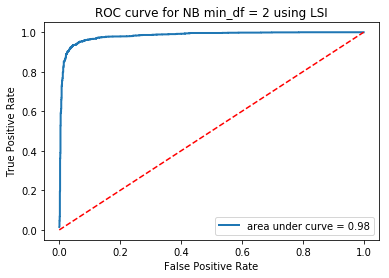

confusion matrix
[[1048  512]
 [  18 1572]]
accuracy = 0.831746031746
precision = 0.754318618042
recall = 0.988679245283


In [43]:
#performing hard margin SVM classifier for min_df = 2 using LSI
from sklearn.naive_bayes import GaussianNB

nb_pipelined = Pipeline([
                         ('vect', count_vectorizer_min_df_2),
                         ('tfidf', tfidf_transformer),
                         ('svd', lsa_model),
                         ('clf', GaussianNB())
])


nb_pipelined = nb_pipelined.fit(eight_train.data, eight_train_target)
predicted_prob = nb_pipelined.predict_proba(eight_test.data)[:,1]
predicted_data = nb_pipelined.predict(eight_test.data)

roc_title = 'ROC curve for NB min_df = 2 using LSI'
plot_roc_curve(eight_test_target, predicted_prob, roc_title)
compute_prediction_stats(eight_test_target, predicted_data)